In [737]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [738]:
River_Arno = pd.read_csv('./datasets/River_Arno.csv')

In [739]:
River_Arno

Date  Rainfall_Le_Croci  Rainfall_Cavallina  Rainfall_S_Agata  \
0     01/01/1998                NaN                 NaN               NaN   
1     02/01/1998                NaN                 NaN               NaN   
2     03/01/1998                NaN                 NaN               NaN   
3     04/01/1998                NaN                 NaN               NaN   
4     05/01/1998                NaN                 NaN               NaN   
...          ...                ...                 ...               ...   
8212  26/06/2020                0.0                 0.0               0.0   
8213  27/06/2020                0.0                 0.0               0.0   
8214  28/06/2020                0.0                 0.0               0.0   
8215  29/06/2020                0.0                 0.0               0.0   
8216  30/06/2020                0.0                 0.0               0.0   

      Rainfall_Mangona  Rainfall_S_Piero  Rainfall_Vernio  Rainfall_Stia  \
0                  NaN               NaN              NaN            NaN   
1                  NaN               NaN              NaN            NaN   
2                  NaN               NaN              NaN            NaN   
3                  NaN               NaN              NaN            NaN   
4                  NaN               NaN              NaN            NaN   
...                ...               ...              ...            ...   
8212               0.0               0.0              NaN            NaN   
8213               0.0               0.0              NaN            NaN   
8214               0.0               0.0              NaN            NaN   
8215               0.0               0.0              NaN            NaN   
8216               0.0               0.0              NaN            NaN   

      Rainfall_Consuma  Rainfall_Incisa  Rainfall_Montevarchi  \
0                  NaN              NaN                   NaN   
1                  NaN              NaN                   NaN   
2                  NaN              NaN                   NaN   
3                  NaN              NaN                   NaN   
4                  NaN              NaN                   NaN   
...                ...              ...                   ...   
8212               NaN              NaN                   NaN   
8213               NaN              NaN                   NaN   
8214               NaN              NaN                   NaN   
8215               NaN              NaN                   NaN   
8216               NaN              NaN                   NaN   

      Rainfall_S_Savino  Rainfall_Laterina  Rainfall_Bibbiena  \
0                   NaN                NaN                NaN   
1                   NaN                NaN                NaN   
2                   NaN                NaN                NaN   
3                   NaN                NaN                NaN   
4                   NaN                NaN                NaN   
...                 ...                ...                ...   
8212                NaN                NaN                NaN   
8213                NaN                NaN                NaN   
8214                NaN                NaN                NaN   
8215                NaN                NaN                NaN   
8216                NaN                NaN                NaN   

      Rainfall_Camaldoli  Temperature_Firenze  Hydrometry_Nave_di_Rosano  
0                    NaN                  NaN                       1.82  
1                    NaN                  NaN                       1.94  
2                    NaN                  NaN                       2.11  
3                    NaN                  NaN                       1.84  
4                    NaN                  NaN                       1.88  
...                  ...                  ...                        ...  
8212                 NaN                  NaN                       1.34  
8213        

In [740]:
River_Arno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [741]:
River_Arno.shape

(8217, 17)

### Filled Entries

<AxesSubplot:>

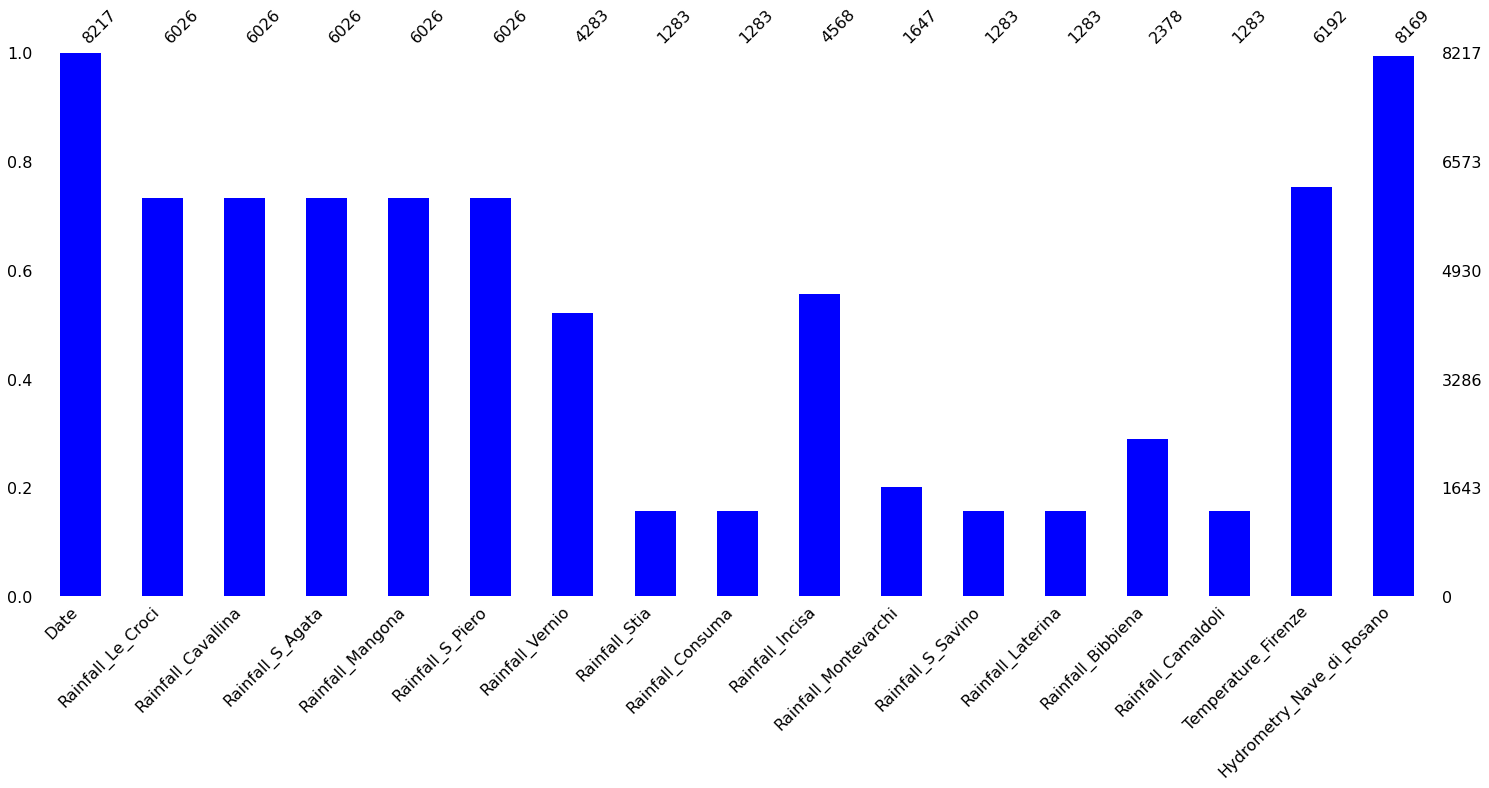

In [742]:
msno.bar(River_Arno,color='b')

In [743]:
# River_Arno = River_Arno.drop(River_Arno['Hydrometry_Nave_di_Rosano'].isnull().sum(),axis=0)


In [744]:
# River_Arno['Hydrometry_Nave_di_Rosano'].isnull().sum()

### Dates starting and ending values

In [745]:
print('starting date:', River_Arno.Date.values[[0,-1]][0])
print('ending date:', River_Arno.Date.values[[0,-1]][1])


starting date: 01/01/1998
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

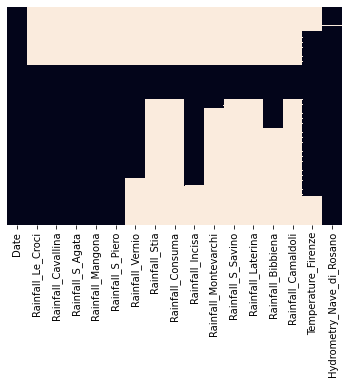

In [746]:
sns.heatmap(River_Arno.isnull(),yticklabels=False,cbar=False)

In [747]:
data=River_Arno.copy()
data.drop('Date',axis=1,inplace=True)

In [748]:
'''
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2,k=10)
x, y = data.iloc[:, :-1], data.iloc[:, -1]
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores
'''

"\nfrom sklearn.feature_selection import SelectKBest, chi2\nbestfeatures = SelectKBest(score_func=chi2,k=10)\nx, y = data.iloc[:, :-1], data.iloc[:, -1]\nfit = bestfeatures.fit(x,y)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(x.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']\nfeatureScores\n"

In [749]:
'''
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
x, y = data.iloc[:, :-1], data.iloc[:, -1]
model.fit(x,y)
print(model.feature_importances_)
'''

'\nfrom sklearn.ensemble import ExtraTreesClassifier\nimport matplotlib.pyplot as plt\nmodel = ExtraTreesClassifier()\nx, y = data.iloc[:, :-1], data.iloc[:, -1]\nmodel.fit(x,y)\nprint(model.feature_importances_)\n'

### Feature Selection

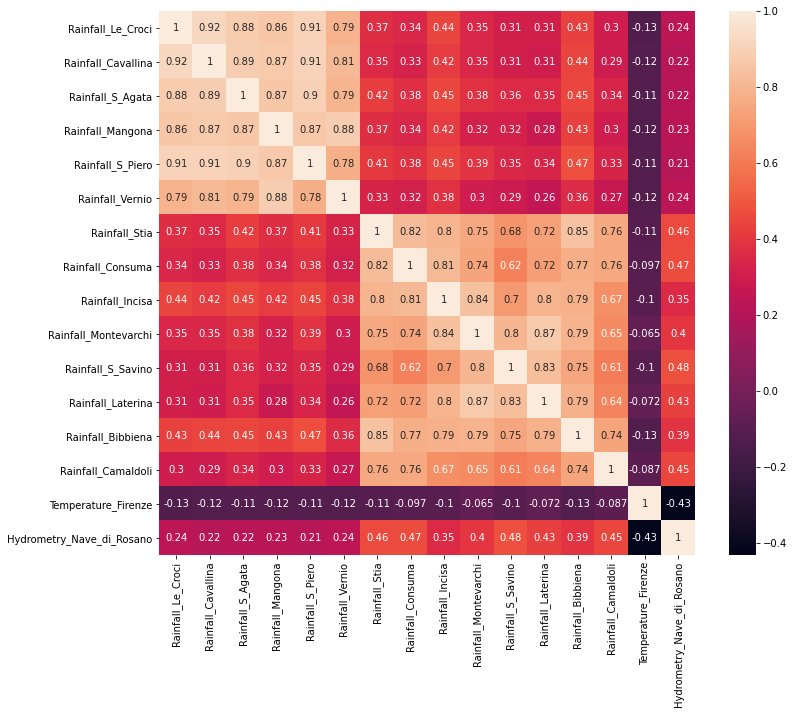

In [750]:
#sns.heatmap(data.corr())
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [751]:
features_nan=[features for features in River_Arno.columns if River_Arno[features].isnull().sum()>1 and River_Arno[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(River_Arno[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Le_Croci 26.6642 % missing 
Rainfall_Cavallina 26.6642 % missing 
Rainfall_S_Agata 26.6642 % missing 
Rainfall_Mangona 26.6642 % missing 
Rainfall_S_Piero 26.6642 % missing 
Rainfall_Vernio 47.8764 % missing 
Rainfall_Stia 84.386 % missing 
Rainfall_Consuma 84.386 % missing 
Rainfall_Incisa 44.4079 % missing 
Rainfall_Montevarchi 79.9562 % missing 
Rainfall_S_Savino 84.386 % missing 
Rainfall_Laterina 84.386 % missing 
Rainfall_Bibbiena 71.06 % missing 
Rainfall_Camaldoli 84.386 % missing 
Temperature_Firenze 24.644 % missing 
Hydrometry_Nave_di_Rosano 0.5842 % missing 


In [752]:
'''
Columns that are going to be dropped

'Date',
'Hydrometry_Nave_di_Rosano', # Target Variable
'Rainfall_S_Savino',
'Rainfall_Consuma',
'Rainfall_Laterina',
'Rainfall_Camaldoli',
'Rainfall_Stia',
'',
'Rainfall_Montevarchi',
'Rainfall_Bibbiena',
'Rainfall_Incisa'

'''

"\nColumns that are going to be dropped\n\n'Date',\n'Hydrometry_Nave_di_Rosano', # Target Variable\n'Rainfall_S_Savino',\n'Rainfall_Consuma',\n'Rainfall_Laterina',\n'Rainfall_Camaldoli',\n'Rainfall_Stia',\n'',\n'Rainfall_Montevarchi',\n'Rainfall_Bibbiena',\n'Rainfall_Incisa'\n\n"

In [753]:
River_Arno_corr = River_Arno.drop(['Rainfall_S_Savino','Rainfall_Consuma','Rainfall_Laterina','Rainfall_Camaldoli','Rainfall_Stia','Date','Rainfall_Montevarchi','Rainfall_Bibbiena','Rainfall_Incisa'],axis=1)
River_Arno = River_Arno.drop(['Rainfall_S_Savino','Rainfall_Consuma','Rainfall_Laterina','Rainfall_Camaldoli','Rainfall_Stia','Rainfall_Montevarchi','Rainfall_Bibbiena','Rainfall_Incisa'],axis=1)

<AxesSubplot:>

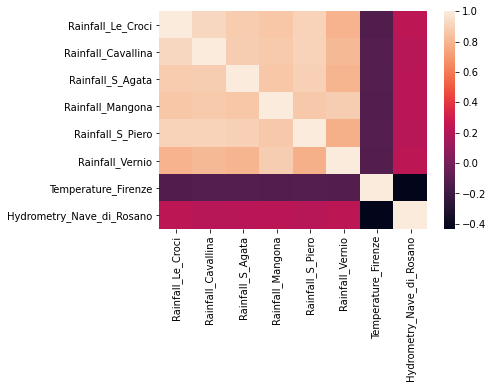

In [754]:
sns.heatmap(River_Arno_corr.corr())

In [755]:
a = River_Arno

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Le_Croci 26.6642 % missing 
Rainfall_Cavallina 26.6642 % missing 
Rainfall_S_Agata 26.6642 % missing 
Rainfall_Mangona 26.6642 % missing 
Rainfall_S_Piero 26.6642 % missing 
Rainfall_Vernio 47.8764 % missing 
Temperature_Firenze 24.644 % missing 
Hydrometry_Nave_di_Rosano 0.5842 % missing 


### Imputation

Rainfall_Le_Croci

In [756]:
def cal(x):
    null_values=x.isnull().sum()
    count_values=x.value_counts().unique
    mean=x.mean()
    median=x.median()
    mode=x.mode()
    print('null_values: ',null_values,'count_values: ', count_values, 'mean: ',mean,'median: ', median,'mode: ',mode, sep=' \n  ' )
    return

In [757]:
x=a['Rainfall_Le_Croci']
cal(x)

null_values:  
  2191 
  count_values:  
  <bound method Series.unique of 0.0     3779
0.2      342
0.4      141
0.8       89
0.6       77
        ... 
52.4       1
74.0       1
26.0       1
22.2       1
39.6       1
Name: Rainfall_Le_Croci, Length: 230, dtype: int64> 
  mean:  
  3.1298705609027775 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [758]:
a['Rainfall_Le_Croci']=a['Rainfall_Le_Croci'].fillna(a['Rainfall_Cavallina'].mean())

Rainfall_Cavallina

In [759]:
x=a['Rainfall_Cavallina']
cal(x)

null_values:  
  2191 
  count_values:  
  <bound method Series.unique of 0.0     4124
0.2      270
0.4      114
0.6       65
1.2       58
        ... 
36.6       1
33.2       1
63.0       1
28.8       1
52.4       1
Name: Rainfall_Cavallina, Length: 219, dtype: int64> 
  mean:  
  2.674742781281121 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [760]:
a['Rainfall_Cavallina']=a['Rainfall_Cavallina'].fillna(a['Rainfall_Cavallina'].mean())

Rainfall_S_Agata

In [761]:
x=a['Rainfall_S_Agata']
cal(x)

null_values:  
  2191 
  count_values:  
  <bound method Series.unique of 0.0      3755
0.2       378
0.4       137
0.6        86
1.0        72
         ... 
41.8        1
102.4       1
26.0        1
62.2        1
18.0        1
Name: Rainfall_S_Agata, Length: 207, dtype: int64> 
  mean:  
  2.670063060073033 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [762]:
a['Rainfall_S_Agata']=a['Rainfall_S_Agata'].fillna(a['Rainfall_S_Agata'].mean())

Rainfall_Mangona

In [763]:
x=a['Rainfall_Mangona']
cal(x)

null_values:  
  2191 
  count_values:  
  <bound method Series.unique of 0.0     3822
0.2      291
0.4      107
0.8       86
0.6       85
        ... 
39.8       1
44.8       1
57.2       1
86.0       1
76.6       1
Name: Rainfall_Mangona, Length: 247, dtype: int64> 
  mean:  
  3.3406571523398827 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [764]:
a['Rainfall_Mangona']=a['Rainfall_Mangona'].fillna(a['Rainfall_Mangona'].mean())

Rainfall_S_Piero

In [765]:
x=a['Rainfall_S_Piero']
cal(x)

null_values:  
  2191 
  count_values:  
  <bound method Series.unique of 0.0     3679
0.2      545
0.4      148
0.6       81
0.8       72
        ... 
52.4       1
34.2       1
50.4       1
59.2       1
27.8       1
Name: Rainfall_S_Piero, Length: 206, dtype: int64> 
  mean:  
  2.4712246929970267 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [766]:
a['Rainfall_S_Piero']=a['Rainfall_S_Piero'].fillna(a['Rainfall_S_Piero'].mean())

Rainfall_Vernio

In [767]:
x=a['Rainfall_Vernio']
cal(x)

null_values:  
  3934 
  count_values:  
  <bound method Series.unique of 0.0     2666
0.2      285
0.4       90
0.6       65
0.8       55
        ... 
21.4       1
32.2       1
45.6       1
52.8       1
28.6       1
Name: Rainfall_Vernio, Length: 226, dtype: int64> 
  mean:  
  3.416437076815326 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [768]:
a['Rainfall_Vernio']=a['Rainfall_Vernio'].fillna(a['Rainfall_Vernio'].mean())

Temperature_Firenze

In [769]:
x=a['Temperature_Firenze']
cal(x)

null_values:  
  2025 
  count_values:  
  <bound method Series.unique of  14.25    25
 11.00    24
 15.90    22
 16.55    22
 12.75    21
          ..
 2.35      1
 33.85     1
 1.30      1
-1.75      1
 1.60      1
Name: Temperature_Firenze, Length: 658, dtype: int64> 
  mean:  
  16.60538598191213 
  median:  
  16.35 
  mode:  
  0    14.25
dtype: float64


In [770]:
a['Temperature_Firenze']=a['Temperature_Firenze'].fillna(a['Temperature_Firenze'].mean())

Hydrometry_Nave_di_Rosano

In [771]:
x=a['Hydrometry_Nave_di_Rosano']
cal(x)

null_values:  
  48 
  count_values:  
  <bound method Series.unique of 1.06    198
1.08    193
1.09    190
0.00    187
1.04    174
       ... 
3.03      1
3.42      1
4.51      1
3.19      1
4.12      1
Name: Hydrometry_Nave_di_Rosano, Length: 337, dtype: int64> 
  mean:  
  1.4724066593218288 
  median:  
  1.3 
  mode:  
  0    1.06
dtype: float64


In [772]:
a['Hydrometry_Nave_di_Rosano']=a['Hydrometry_Nave_di_Rosano'].fillna(a['Hydrometry_Nave_di_Rosano'].mean())

In [773]:
a.isnull().sum()

Date                         0
Rainfall_Le_Croci            0
Rainfall_Cavallina           0
Rainfall_S_Agata             0
Rainfall_Mangona             0
Rainfall_S_Piero             0
Rainfall_Vernio              0
Temperature_Firenze          0
Hydrometry_Nave_di_Rosano    0
dtype: int64

C:\Users\shahi\anaconda3\envs\strive\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


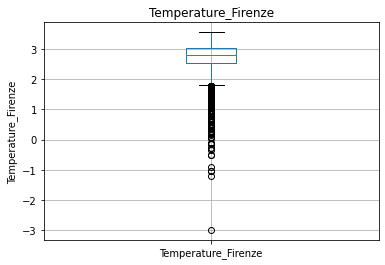

In [774]:
a = a.drop(['Date'],axis=1)
a

for feature in a.columns:
    data=a.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [775]:
q1 = a['Temperature_Firenze'].quantile(0.25)
q3 = a['Temperature_Firenze'].quantile(0.75)

IQR = q3-q1

lower_extreme = q1 - 1.5*IQR
upper_extreme = q3 + 1.5*IQR

out1= a[(a['Temperature_Firenze']<lower_extreme)].values
out2= a[(a['Temperature_Firenze']>upper_extreme)].values

mean = a['Temperature_Firenze'].mean()



a['Temperature_Firenze'].replace(out1,lower_extreme,inplace=True)
a['Temperature_Firenze'].replace(out2,upper_extreme,inplace=True)

# out = a[(a['Temperature_Firenze']<lower_extreme)|(a['Temperature_Firenze']>upper_extreme)].index

# a.drop(out,inplace=True)




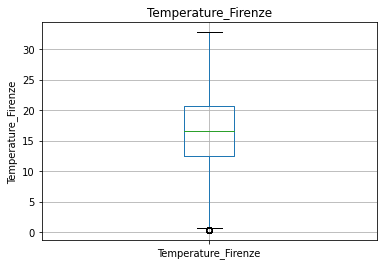

In [776]:
for feature in a.columns:
    data=a.copy()
    if 0 in data[feature].unique():
        pass
    else:
        # data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [777]:
a

Rainfall_Le_Croci  Rainfall_Cavallina  Rainfall_S_Agata  \
0              2.674743            2.674743          2.670063   
1              2.674743            2.674743          2.670063   
2              2.674743            2.674743          2.670063   
3              2.674743            2.674743          2.670063   
4              2.674743            2.674743          2.670063   
...                 ...                 ...               ...   
8212           0.000000            0.000000          0.000000   
8213           0.000000            0.000000          0.000000   
8214           0.000000            0.000000          0.000000   
8215           0.000000            0.000000          0.000000   
8216           0.000000            0.000000          0.000000   

      Rainfall_Mangona  Rainfall_S_Piero  Rainfall_Vernio  \
0             3.340657          2.471225         3.416437   
1             3.340657          2.471225         3.416437   
2             3.340657          2.471225         3.416437   
3             3.340657          2.471225         3.416437   
4             3.340657          2.471225         3.416437   
...                ...               ...              ...   
8212          0.000000          0.000000         3.416437   
8213          0.000000          0.000000         3.416437   
8214          0.000000          0.000000         3.416437   
8215          0.000000          0.000000         3.416437   
8216          0.000000          0.000000         3.416437   

      Temperature_Firenze  Hydrometry_Nave_di_Rosano  
0               16.605386                       1.82  
1               16.605386                       1.94  
2               16.605386                       2.11  
3               16.605386                       1.84  
4               16.605386                       1.88  
...                   ...                        ...  
8212            16.605386                       1.34  
8213            16.605386                       1.21  
8214            16.605386                       1.30  
8215            16.605386                       1.19  
8216            16.605386                       1.30  

[8217 rows x 8 columns]

In [778]:
from sklearn.preprocessing import Normalizer
scale = Normalizer()
dataset = scale.fit_transform(a)
df = pd.DataFrame(dataset)
clms = a.columns
df.columns = clms
df

Rainfall_Le_Croci  Rainfall_Cavallina  Rainfall_S_Agata  \
0              0.147368            0.147368          0.147110   
1              0.147267            0.147267          0.147009   
2              0.147113            0.147113          0.146856   
3              0.147351            0.147351          0.147093   
4              0.147318            0.147318          0.147060   
...                 ...                 ...               ...   
8212           0.000000            0.000000          0.000000   
8213           0.000000            0.000000          0.000000   
8214           0.000000            0.000000          0.000000   
8215           0.000000            0.000000          0.000000   
8216           0.000000            0.000000          0.000000   

      Rainfall_Mangona  Rainfall_S_Piero  Rainfall_Vernio  \
0             0.184057          0.136155         0.188232   
1             0.183931          0.136061         0.188103   
2             0.183739          0.135920         0.187907   
3             0.184036          0.136139         0.188211   
4             0.183995          0.136109         0.188168   
...                ...               ...              ...   
8212          0.000000          0.000000         0.200895   
8213          0.000000          0.000000         0.201010   
8214          0.000000          0.000000         0.200932   
8215          0.000000          0.000000         0.201027   
8216          0.000000          0.000000         0.200932   

      Temperature_Firenze  Hydrometry_Nave_di_Rosano  
0                0.914890                   0.100275  
1                0.914264                   0.106813  
2                0.913311                   0.116052  
3                0.914788                   0.101365  
4                0.914582                   0.103546  
...                   ...                        ...  
8212             0.976439                   0.078795  
8213             0.976999                   0.071192  
8214             0.976617                   0.076457  
8215             0.977080                   0.070021  
8216             0.976617                   0.076457  

[8217 rows x 8 columns]

In [780]:
#pd.DataFrame.to_csv(a,'./new_datasets/River_Arno.csv',index=False)
pd.DataFrame.to_csv(df,'./new_datasets/River_Arno_scaled.csv',index=False)